In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pylab
import glob, os
import scipy.stats as stats
from scipy.stats import gaussian_kde
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score
import timeit
%matplotlib inline

In [2]:
# Format to remove scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Read data

In [5]:
df_train = pd.read_csv(r'C:\Users\Angela\Documents\Github\fast-trips_dwell_time_model\KC_Metro_Inner_dataset\KC_df_train.csv')
df_test = pd.read_csv(r'C:\Users\Angela\Documents\Github\fast-trips_dwell_time_model\KC_Metro_Inner_dataset\KC_df_test.csv')

In [4]:
df_train.columns

Index([u'Unnamed: 0', u'BUS_TYPE', u'DOOR_OPEN_SEC', u'DWELL_SEC', u'LOAD',
       u'NUM_DOORS', u'OFFS', u'ONS', u'RTE', u'Route Type', u'STOP_ID',
       u'STOP_SEQ', u'TRIP_ID', u'VEHICLE_ID', u'capacity', u'date_id',
       u'downtown_stop', u'low_floor', u'pre_load', u'Artic', u'Std',
       u'high_floor', u'twodoors', u'threedoors', u'E', u'R', u'ON+OFF',
       u'ma_pasg', u'ab_pasg', u'pre_standees', u'pre_crowding', u'friction',
       u'on_art', u'off_art', u'on_threedoors', u'off_threedoors',
       u'on_twodoors', u'off_twodoors', u'on_low', u'off_low', u'on_rapid',
       u'off_rapid', u'on_express', u'off_express'],
      dtype='object')

In [ ]:
np.unique(df_test['BUS_TYPE'])

In [6]:
artic = df_test[df_test['BUS_TYPE'] == 'Artic']

In [7]:
std = df_test[df_test['BUS_TYPE'] == 'Standard']

In [8]:
len(artic)

61080

In [9]:
len(std)

38463

In [10]:
np.sum(artic['ON+OFF'])

273336.0

In [11]:
np.sum(std['ON+OFF'])

118935.0

In [12]:
print np.sum(artic['DOOR_OPEN_SEC'])
print np.sum(std['DOOR_OPEN_SEC'])

881975.0
483284.0


In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def density_plot(x_column, y_column, x_title, y_title, figure_title):
    x2 = artic[x_column]
    y2 = artic[y_column]
    
    start = timeit.default_timer()
    xy2 = np.vstack([x2,y2])
    z2 = gaussian_kde(xy2)(xy2)
    stop = timeit.default_timer()
    print 'z:', stop - start
    # Sort the points by density, so that the densest points are plotted last
    start = timeit.default_timer()
    idx = z2.argsort()
    stop = timeit.default_timer()
    print 'sort data:', stop - start    
    
    x2, y2, z2 = x2[idx], y2[idx], z2[idx]
    fig, ax = plt.subplots()
    ax.scatter(x2, y2, c=z2, s=5, edgecolor='')
    
    x2 = np.linspace(*ax.get_xlim()) 
    ax.plot(x2, x2) 
    ax.plot(x2, 0.8*x2)
    ax.plot(x2, 1.2*x2)
    
    plt.axis([0, 100, 0, 100])
    #plt.title('SF dwell time model : scatter plot colored by density')
    plt.title(figure_title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    
    plt.tight_layout()
    #plt.figure(figsize=(10,5))
    pylab.rcParams['figure.figsize'] = (10.0, 8.0)
    plt.show()

z: 90.6021724891
sort data: 0.00380706292883


c:\anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


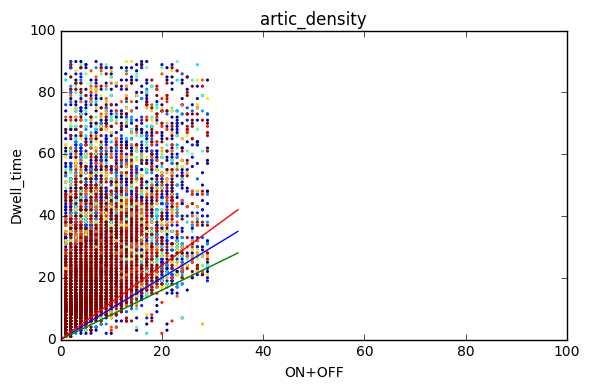

In [15]:
x_column = 'ON+OFF'
y_column = 'DOOR_OPEN_SEC'
density_plot(x_column, y_column, 'ON+OFF', 'Dwell_time', 'artic_density')

In [16]:
def density_plot(x_column, y_column, x_title, y_title, figure_title):
    x2 = std[x_column]
    y2 = std[y_column]
    
    start = timeit.default_timer()
    xy2 = np.vstack([x2,y2])
    z2 = gaussian_kde(xy2)(xy2)
    stop = timeit.default_timer()
    print 'z:', stop - start
    # Sort the points by density, so that the densest points are plotted last
    start = timeit.default_timer()
    idx = z2.argsort()
    stop = timeit.default_timer()
    print 'sort data:', stop - start    
    
    x2, y2, z2 = x2[idx], y2[idx], z2[idx]
    fig, ax = plt.subplots()
    ax.scatter(x2, y2, c=z2, s=5, edgecolor='')
    
    x2 = np.linspace(*ax.get_xlim()) 
    ax.plot(x2, x2) 
    ax.plot(x2, 0.8*x2)
    ax.plot(x2, 1.2*x2)
    
    plt.axis([0, 100, 0, 100])
    #plt.title('SF dwell time model : scatter plot colored by density')
    plt.title(figure_title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    
    plt.tight_layout()
    #plt.figure(figsize=(10,5))
    pylab.rcParams['figure.figsize'] = (10.0, 8.0)
    plt.show()

z: 38.5612432421
sort data: 0.00226183971824


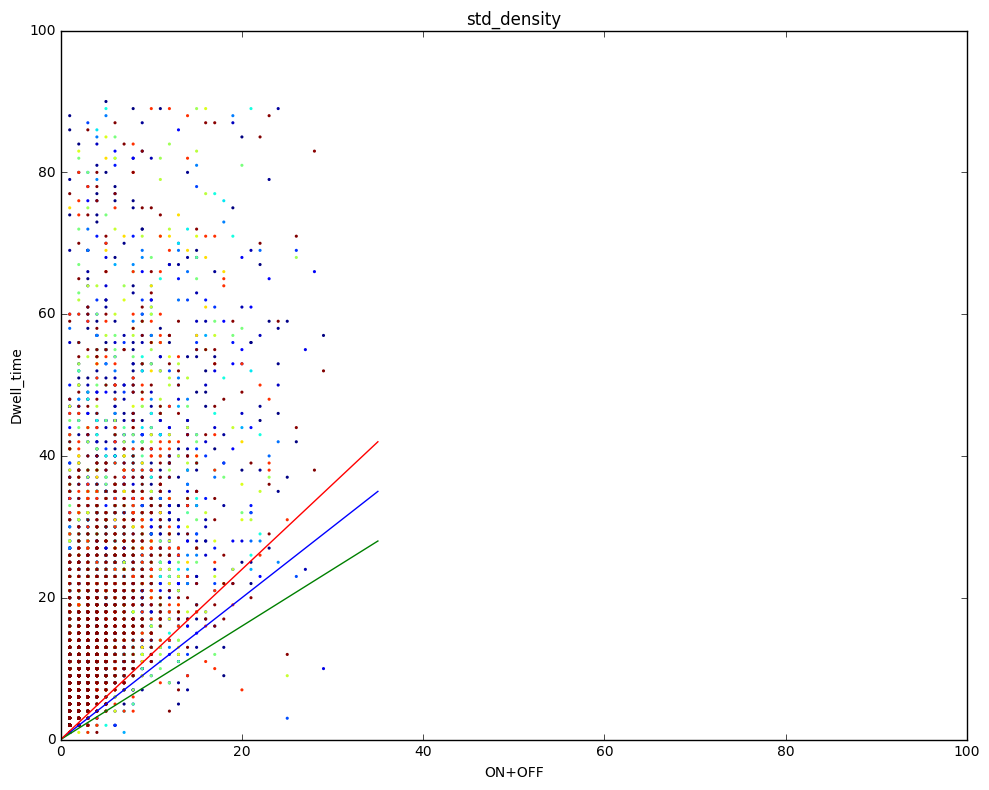

In [23]:
x_column = 'ON+OFF'
y_column = 'DOOR_OPEN_SEC'
density_plot(x_column, y_column, 'ON+OFF', 'Dwell_time', 'std_density')

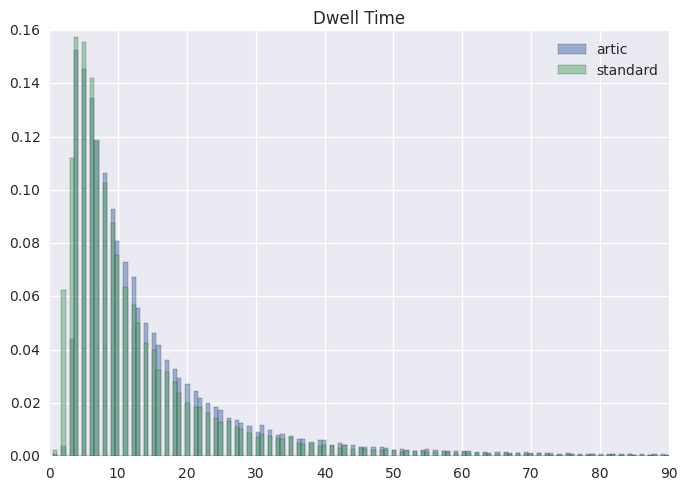

In [41]:
import pylab as plt
y = artic['DOOR_OPEN_SEC']
x = std['DOOR_OPEN_SEC']
y.hist(bins=150, normed=True, alpha=0.5, range=[0,90], label='artic')
x.hist(bins=150, normed=True, alpha=0.5, range=[0,90], label='standard')

plt.legend(loc='upper right')
plt.title('Dwell Time')

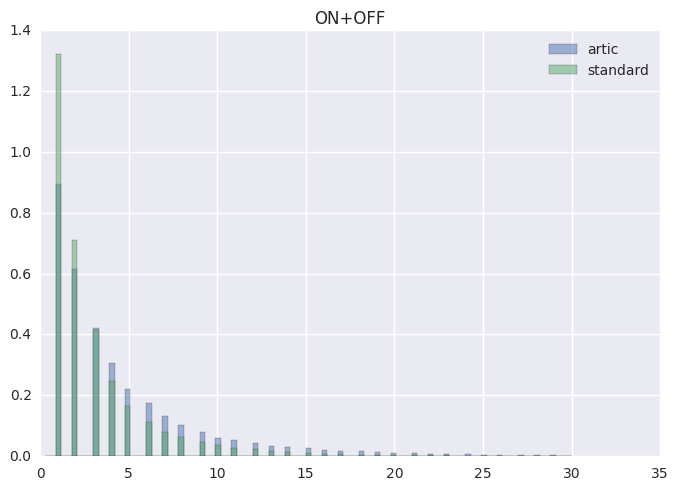

In [40]:
import pylab as plt
y = artic['ON+OFF']
x = std['ON+OFF']
y.hist(bins=100, normed=True, alpha=0.5, range=[0,30], label='artic')
x.hist(bins=100, normed=True, alpha=0.5, range=[0,30], label='standard')

plt.legend(loc='upper right')
plt.title('ON+OFF')

# Build multi-linear regression model

In [6]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [7]:
type(df_train['NUM_DOORS'])

pandas.core.series.Series

In [8]:
np.unique(df_train['twodoors'])

array([0, 1], dtype=int64)

In [10]:
X_train = df_train[['ONS','OFFS','Artic','low_floor','threedoors','twodoors', 'E', 'R', 
                     'on_threedoors','off_threedoors', 'on_twodoors', 'off_twodoors', 'on_low','off_low',
                     'on_express','off_express','on_rapid','off_rapid', 'on_art', 'off_art']]

X_test = df_test[['ONS','OFFS','Artic','low_floor','threedoors','twodoors', 'E', 'R', 
                   'on_threedoors','off_threedoors', 'on_twodoors', 'off_twodoors', 'on_low','off_low',
                   'on_express','off_express','on_rapid','off_rapid','on_art', 'off_art']]

y_train = df_train['DOOR_OPEN_SEC']
y_test = df_test['DOOR_OPEN_SEC']

In [11]:
lm = LinearRegression()
lm.fit(X_train, y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
LinearRegression(copy_X=True, fit_intercept=True,normalize=False)

# Construct a data frame that contains features and estimated coefficients
sklearn_results = pd.DataFrame(zip(X_train.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])
# p-values
scores, pvalues = chi2(X_train, y_train)
sklearn_results['pvalues'] = pd.DataFrame(pvalues)
sklearn_results['scores'] = pd.DataFrame(scores)

In [12]:
len(df_train)

232843

Run Linear Regression In Python SciKit-Learn

In [13]:
start = timeit.default_timer()
lm = LinearRegression()
lm.fit(X_train, y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
LinearRegression(copy_X=True, fit_intercept=True,normalize=False)

# Construct a data frame that contains features and estimated coefficients
sklearn_results = pd.DataFrame(zip(X_train.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])
# p-values
scores, pvalues = chi2(X_train, y_train)
sklearn_results['pvalues'] = pd.DataFrame(pvalues)
sklearn_results['scores'] = pd.DataFrame(scores)

stop = timeit.default_timer()
print 'build model with veh&day ids:', stop - start

build model with veh&day ids: 0.516935709536


In [14]:
print sklearn_results

          features  estimatedCoefficients  pvalues     scores
0              ONS                  3.716    0.000 395825.784
1             OFFS                  2.220    0.000 109671.505
2            Artic                  0.618    0.000   3048.379
3        low_floor                 -2.628    0.000    503.762
4       threedoors                  4.860    0.000   2843.570
5         twodoors                  4.455    0.000    704.337
6                E                  0.894    0.000   1417.698
7                R                  0.449    0.000   1762.449
8    on_threedoors                 -0.482    0.000 138847.218
9   off_threedoors                 -0.799    0.000  53717.499
10     on_twodoors                 -0.322    0.000 265402.620
11    off_twodoors                 -0.576    0.000  60754.922
12          on_low                 -0.212    0.000 321085.885
13         off_low                 -0.295    0.000  80921.598
14      on_express                 -0.375    0.000 123218.546
15     o

In [98]:
sklearn_results.to_csv(r'C:\Users\Angela\Documents\Github\fast-trips_dwell_time_model\KC_Metro_Inner_dataset\Final_friction.csv')

In [15]:
R2 = r2_score(y_train, pred_train) 
print R2

0.449963077915


# T value

In [16]:
from statsmodels.formula.api import ols

In [17]:
x = X_train
y = y_train

In [18]:
model = ols("y ~ x", df_train).fit()

In [19]:
x.columns

Index([u'ONS', u'OFFS', u'Artic', u'low_floor', u'threedoors', u'twodoors',
       u'E', u'R', u'on_threedoors', u'off_threedoors', u'on_twodoors',
       u'off_twodoors', u'on_low', u'off_low', u'on_express', u'off_express',
       u'on_rapid', u'off_rapid', u'on_art', u'off_art'],
      dtype='object')

In [20]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     9523.
Date:                Wed, 21 Dec 2016   Prob (F-statistic):               0.00
Time:                        12:56:07   Log-Likelihood:            -8.5710e+05
No. Observations:              232843   AIC:                         1.714e+06
Df Residuals:                  232822   BIC:                         1.714e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.1938      0.200     15.965      0.0

# Correlation 

In [62]:
c = X_train[['ONS', u'OFFS', u'Artic', u'low_floor', u'threedoors', u'twodoors',
       u'R', u'E']].corr().abs()
s = c.unstack()
so = s.order(kind="quicksort")

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


In [67]:
print len(so)
soo = so.dropna()
soo = soo[soo >= 0.300]
soo = soo[soo != 1.0]
print len(soo)

64
12


In [68]:
soo

Artic       twodoors     0.453
twodoors    Artic        0.453
Artic       R            0.462
R           Artic        0.462
Artic       threedoors   0.518
threedoors  Artic        0.518
twodoors    R            0.849
R           twodoors     0.849
threedoors  R            0.891
R           threedoors   0.891
threedoors  twodoors     0.952
twodoors    threedoors   0.952
dtype: float64

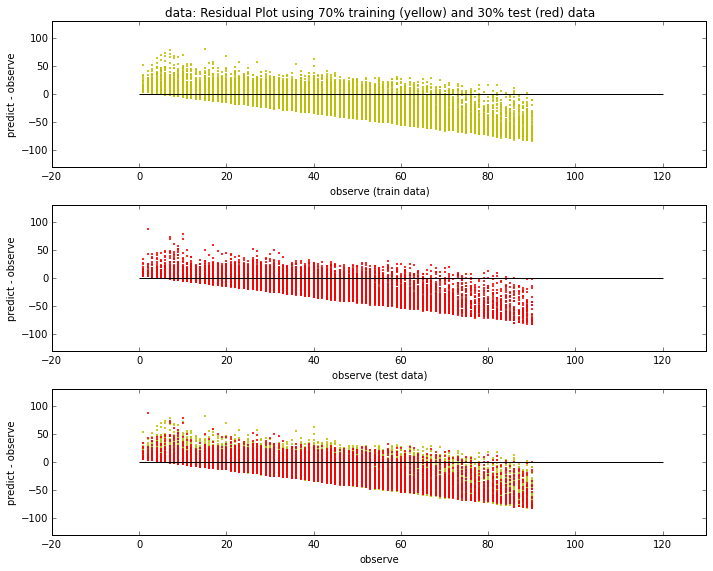

In [101]:
plt.figure(1)

plt.subplot(311)
plt.scatter(y_train, lm.predict(X_train) - y_train, c='y', s=1,edgecolor='y')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-20, 130, -130, 130])
plt.title('data: Residual Plot using 70% training (yellow) and 30% test (red) data')
plt.ylabel('predict - observe')
plt.xlabel('observe (train data)')

plt.subplot(312)
plt.scatter(y_test, lm.predict(X_test) - y_test, c='r', s=1,edgecolor='r')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-20, 130, -130, 130])
plt.ylabel('predict - observe')
plt.xlabel('observe (test data)')

plt.subplot(313)
plt.scatter(y_train, lm.predict(X_train) - y_train, c='y', s=1, edgecolor='y')
plt.scatter(y_test, lm.predict(X_test) - y_test, c='r', s=1, edgecolor='r')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-20, 130, -130, 130])
plt.ylabel('predict - observe')
plt.xlabel('observe')

plt.tight_layout()
plt.figure(figsize=(10,5))
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.show()

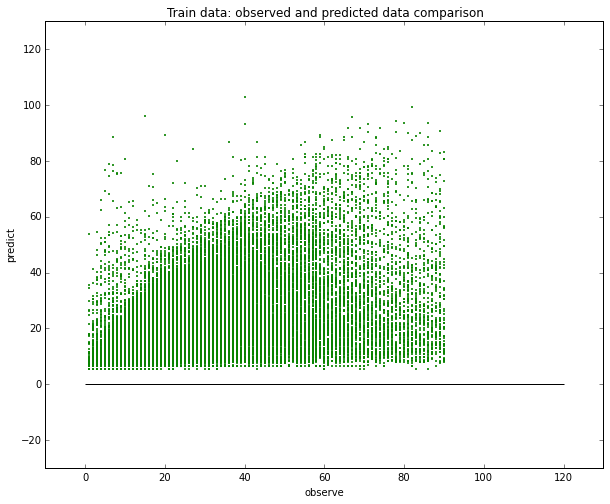

In [88]:
plt.figure(1)

plt.scatter(y_train, lm.predict(X_train), c='y', s=1,edgecolor='g')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-10, 130, -30, 130])
plt.title('Train data: observed and predicted data comparison')
plt.ylabel('predict')
plt.xlabel('observe')
plt.figure(figsize=(10,5))
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.show()

In [21]:
df_test['predicted_data'] = lm.predict(X_test)

In [22]:
def density_plot(x_column, y_column, x_title, y_title, figure_title):
    x2 = df_test[x_column]
    y2 = df_test[y_column]
    
    start = timeit.default_timer()
    xy2 = np.vstack([x2,y2])
    z2 = gaussian_kde(xy2)(xy2)
    stop = timeit.default_timer()
    print 'z:', stop - start
    # Sort the points by density, so that the densest points are plotted last
    start = timeit.default_timer()
    idx = z2.argsort()
    stop = timeit.default_timer()
    print 'sort data:', stop - start    
    
    x2, y2, z2 = x2[idx], y2[idx], z2[idx]
    fig, ax = plt.subplots()
    ax.scatter(x2, y2, c=z2, s=5, edgecolor='')
    
    x2 = np.linspace(*ax.get_xlim()) 
    ax.plot(x2, x2) 
    ax.plot(x2, 0.8*x2)
    ax.plot(x2, 1.2*x2)
    
    plt.axis([0, 100, 0, 100])
    #plt.title('SF dwell time model : scatter plot colored by density')
    plt.title(figure_title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    
    plt.tight_layout()
    #plt.figure(figsize=(10,5))
    pylab.rcParams['figure.figsize'] = (10.0, 8.0)
    plt.show()

In [23]:
x_column = 'DOOR_OPEN_SEC'
y_column = 'predicted_data'
x_title = 'observation'
y_title = 'prediction'
figure_title = 'test'

z: 365.36280172
sort data: 0.00607282134297


C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


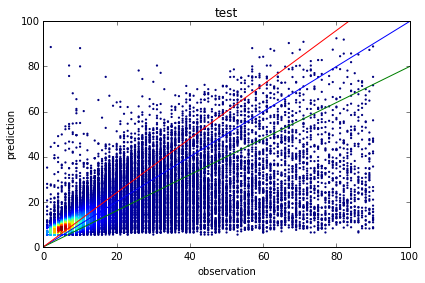

In [24]:
density_plot(x_column, y_column, x_title, y_title, figure_title)

In [25]:
df_test['predicted_data - 3sec'] = lm.predict(X_test) -3

In [26]:
x_column = 'DOOR_OPEN_SEC'
y_column = 'predicted_data - 3sec'
x_title = 'observation'
y_title = 'prediction'
figure_title = 'test'

z: 361.819609315
sort data: 0.00600882699655


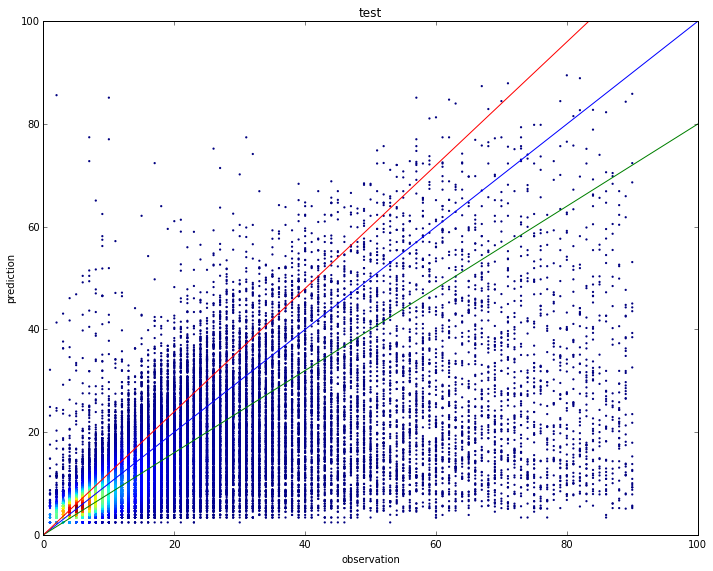

In [27]:
density_plot(x_column, y_column, x_title, y_title, figure_title)

In [29]:
np.unique(df_test['ONS'] + df_test['OFFS'])

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.])

In [30]:
test2 = df_test
test2['ON+OFF'] = df_test['ONS'] + df_test['OFFS']

In [32]:
df_test2 = test2[test2['ON+OFF'] <= 20]

In [34]:
df_train2 = df_train[(df_test['ONS'] + df_test['OFFS']) <= 20]

C:\Anaconda\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


IndexingError: Unalignable boolean Series key provided

In [ ]:
X_train = df_train2[['ONS','OFFS','Artic','low_floor','threedoors','twodoors', 'E', 'R', 
                     'on_threedoors','off_threedoors', 'on_twodoors', 'off_twodoors', 'on_low','off_low',
                     'on_express','off_express','on_rapid','off_rapid', 'on_art', 'off_art']]

X_test = df_test2[['ONS','OFFS','Artic','low_floor','threedoors','twodoors', 'E', 'R', 
                   'on_threedoors','off_threedoors', 'on_twodoors', 'off_twodoors', 'on_low','off_low',
                   'on_express','off_express','on_rapid','off_rapid','on_art', 'off_art']]

y_train = df_train2['DOOR_OPEN_SEC']
y_test = df_test2['DOOR_OPEN_SEC']

z: 351.272307468
sort data: 0.00603992039396


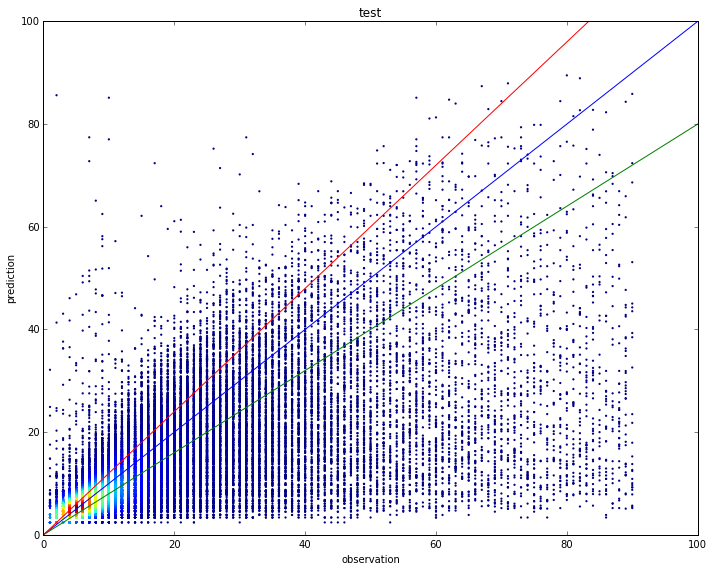

In [122]:
density_plot(x_column, y_column, x_title, y_title, figure_title)

In [127]:
df_test['predicted_data - 3sec'].min()


2.4142402178649407

In [128]:
df_test.to_csv(r'C:\Users\Angela\Documents\Github\fast-trips_dwell_time_model\KC_Metro_Inner_dataset\predicted_result.csv')

# Plotting Scatter, by appling the dewell time model with the rest 30% data

In [73]:
#try the [door_open_sec] as y variable!
lm3 = smf.ols(formula = 'DOOR_OPEN_SEC ~ ONS + OFFS + threedoors_artic + twodoors_artic + friction + \
              On_twodoors_artic + Off_twodoors_artic + on_threedoors_artic + off_threedoors_artic + on_rapid + off_rapid', 
              data = df_train).fit()
print lm3.summary()

                            OLS Regression Results                            
Dep. Variable:          DOOR_OPEN_SEC   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                 1.547e+04
Date:                Thu, 17 Mar 2016   Prob (F-statistic):               0.00
Time:                        14:53:16   Log-Likelihood:            -9.0685e+05
No. Observations:              235391   AIC:                         1.814e+06
Df Residuals:                  235379   BIC:                         1.814e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                5.7448 

In [80]:
X3_train = df_train[['ONS', 'OFFS', 'Artic','ON+OFF', 'threedoors_artic', 'twodoors_artic','friction', 
                     'On_twodoors_artic','Off_twodoors_artic', 'on_threedoors_artic', 'off_threedoors_artic', 
                     'on_rapid', 'off_rapid']]
X3_test = df_test[['ONS', 'OFFS', 'Artic','ON+OFF', 'R', 'E', 'threedoors_artic', 'twodoors_artic','friction', 
                     'On_twodoors_artic','Off_twodoors_artic', 'on_threedoors_artic', 'off_threedoors_artic', 
                     'on_rapid', 'off_rapid']]
y3_train = y_train
y3_test = y_test

In [81]:
#Estimate dwell time for the 'test' dataset
df_est = []
df_est = pd.DataFrame(lm3.predict(X3_test), index = X3_test.index, columns = ['Dwell_Time_Esti'])
test = pd.concat([X3_test, df_est], axis=1, join='inner')
test.head()

,ONS,OFFS,Artic,ON+OFF,R,E,threedoors_artic,twodoors_artic,friction,On_twodoors_artic,Off_twodoors_artic,on_threedoors_artic,off_threedoors_artic,on_rapid,off_rapid,Dwell_Time_Esti
253293,2.000,2.000,0,4.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,15.198
253387,2.000,0.000,0,2.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12.259
253408,0.000,10.000,0,10.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,20.438
253425,3.000,1.000,0,4.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16.986
314282,4.000,0.000,0,4.000,0.000,0.000,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.774


In [82]:
test.columns

Index([u'ONS', u'OFFS', u'Artic', u'ON+OFF', u'R', u'E', u'threedoors_artic', u'twodoors_artic', u'friction', u'On_twodoors_artic', u'Off_twodoors_artic', u'on_threedoors_artic', u'off_threedoors_artic', u'on_rapid', u'off_rapid', u'Dwell_Time_Esti'], dtype='object')

31787 31787


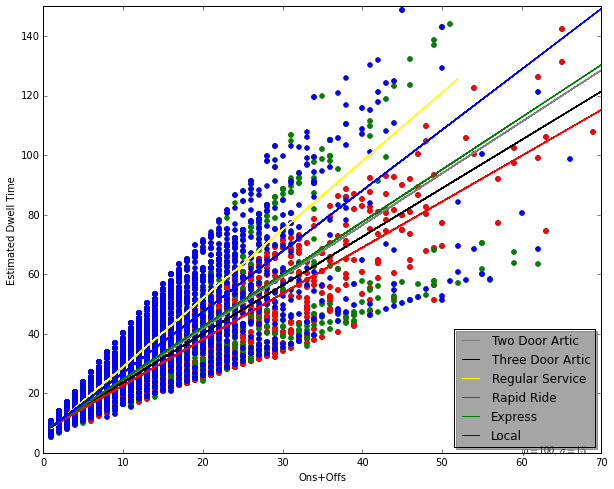

In [86]:
#Create dataframe for specific groups
test_StandardService = test[test.Artic == 0]
test_TwoDoorsArtic = test[(test.twodoors_artic == 1)]
test_ThreeDoorsArtic = test[(test.threedoors_artic == 1)]
test_RapidRide = test[test.R == 1]
test_Express = test[test.E == 1]
test_Local = test[(test.R == 0)&(test.E == 0)]

fig, ax = plt.subplots()

# plot the data itself
x1 = test_TwoDoorsArtic['ON+OFF']
y1 = test_TwoDoorsArtic['Dwell_Time_Esti']
print len(x1), len(y1)
# plot the data itself
ax.scatter(x1, y1, color = 'grey')
#plot the trend line
fit = np.polyfit(x1, y1, deg=1)
ax.plot(x1, fit[0] * x1 + fit[1], color='grey', label='Two Door Artic')

x2 = test_ThreeDoorsArtic['ON+OFF']
y2 = test_ThreeDoorsArtic['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x2, y2, color = 'black')
#plot the trend line
fit = np.polyfit(x2, y2, deg=1)
ax.plot(x2, fit[0] * x2 + fit[1], color='black', label='Three Door Artic')

# plot the data itself
x3 = test_StandardService['ON+OFF']
y3 = test_StandardService['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x3, y3, color = 'yellow')
#plot the trend line
fit = np.polyfit(x3, y3, deg=1)
ax.plot(x3, fit[0] * x3 + fit[1], color='yellow', label= 'Regular Service')

x4 = test_RapidRide['ON+OFF']
y4 = test_RapidRide['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x4, y4, color = 'red')
#plot the trend line
fit = np.polyfit(x4, y4, deg=1)
ax.plot(x4, fit[0] * x4 + fit[1], color='red', label= 'Rapid Ride')

x5 = test_Express['ON+OFF']
y5 = test_Express['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x5, y5, color = 'green')
#plot the trend line
fit = np.polyfit(x5, y5, deg=1)
ax.plot(x5, fit[0] * x5 + fit[1], color='green', label= 'Express')

x6 = test_Local['ON+OFF']
y6 = test_Local['Dwell_Time_Esti']
# plot the data itself
ax.scatter(x6, y6, color = 'blue')
#plot the trend line
fit = np.polyfit(x6, y6, deg=1)
ax.plot(x6, fit[0] * x6 + fit[1], color='blue', label= 'Local')



plt.xlabel('Ons+Offs')
plt.ylabel('Estimated Dwell Time')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
ax.legend(loc='lower right', shadow=True)
#plt.figure(figsize=(10,5))
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.axis([0, 70, 0, 150])

fig.show()

#three doors trend is exactly as same as rapid ride bus... 

In [531]:
print 'end'

end
